In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
weather = pd.read_csv('data/last_ten_alb.csv')


weather['YEARMODA'] = pd.to_datetime(weather['YEARMODA'])
print("Most recent date in data:", weather['YEARMODA'].max())

Most recent date in data: 2021-10-04 00:00:00


In [3]:
weather['SLP1'] = weather['SLP'].shift(1)
weather['SLP2'] = weather['SLP'].shift(2)
weather['SLP3'] = weather['SLP'].shift(3)

In [4]:
display(weather[['YEARMODA', 'SLP', 'SLP1', 'SLP2', 'SLP3']].head())

,YEARMODA,SLP,SLP1,SLP2,SLP3
0,2011-01-01,1017.7,NaN,NaN,NaN
1,2011-01-02,1014.2,1017.7,NaN,NaN
2,2011-01-03,1018.5,1014.2,1017.7,NaN
3,2011-01-04,1015.2,1018.5,1014.2,1017.7
4,2011-01-05,1009.0,1015.2,1018.5,1014.2


In [5]:
pred_vars = ['YDAY', 'SLP1']

# make list of all variables required to generate a forecast
model_vars = pred_vars + ['I_PRCP']

weather.dropna(subset=model_vars, inplace=True)

In [6]:
train, test= np.split(weather, [int(.67 *len(weather))])

In [7]:
rf = RandomForestClassifier()

rf.fit(train[pred_vars], train['I_PRCP'])

RandomForestClassifier()

              precision    recall  f1-score   support

           0    0.60195   0.67442   0.63613       731
           1    0.50209   0.42403   0.45977       566

    accuracy                        0.56515      1297
   macro avg    0.55202   0.54922   0.54795      1297
weighted avg    0.55837   0.56515   0.55917      1297



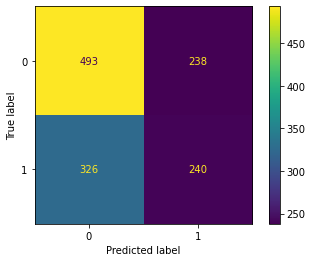

In [8]:
# get predictions
pred_p_prcp = rf.predict_proba(test.loc[:, pred_vars])
pred_i_prcp = rf.predict(test.loc[:, pred_vars])

# evaluation

metrics.plot_confusion_matrix(rf, test.loc[:, pred_vars], test['I_PRCP'])
print(metrics.classification_report(test['I_PRCP'], pred_i_prcp, digits=5))

In [9]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
file_name = 'rf_1day_prcp.sav' 
pickle.dump(rf, open(file_name, 'wb'))

In [10]:
weather = pd.read_csv('data/last_ten_alb.csv')


weather['YEARMODA'] = pd.to_datetime(weather['YEARMODA'])
print("Most recent date in data:", weather['YEARMODA'].max())

Most recent date in data: 2021-10-04 00:00:00


In [11]:
most_recent_data = weather['YEARMODA'].max()
# https://stackoverflow.com/questions/39964558/pandas-max-value-index
most_recent_yday = weather.loc[weather['YEARMODA'].idxmax(), 'YDAY']
print("Most recent date in data:", weather['YEARMODA'].max())


# figure out starting dates for predictions
prediction_start = most_recent_data + timedelta(days=1)
prediction_start_yday = list(most_recent_yday + range(1,2))

# generate list of dates for predictions
eval_dates = pd.date_range(prediction_start, periods=1).tolist()

Most recent date in data: 2021-10-04 00:00:00


In [12]:
predictions_df = pd.DataFrame(eval_dates, columns=['YEARMODA'])
predictions_df['YDAY'] = prediction_start_yday


# add these to the main dataframe
weather = weather.append(predictions_df, ignore_index=True)
weather[['YEARMODA', 'YDAY', 'SLP', 'I_PRCP']].tail()

,YEARMODA,YDAY,SLP,I_PRCP
3926,2021-10-01,274,1022.8,0.0
3927,2021-10-02,275,1020.0,0.0
3928,2021-10-03,276,1015.1,0.0
3929,2021-10-04,277,1015.2,1.0
3930,2021-10-05,278,NaN,NaN


In [13]:
weather['SLP1'] = weather['SLP'].shift(1)
weather['SLP2'] = weather['SLP'].shift(2)
weather['SLP3'] = weather['SLP'].shift(3)

In [14]:
prediction_set = weather[(weather['YEARMODA'] >= prediction_start)].copy()

In [15]:
prediction_set.head() # see the lagged columns on the end?

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_HAIL,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP,SLP1,SLP2,SLP3
3930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,1015.1,1020.0


In [16]:
rf = pickle.load(open(file_name, 'rb'))

In [17]:
prediction_set['P_PRCP'] = rf.predict_proba(prediction_set[pred_vars])[:,1]

In [18]:
prediction_set.head() # now  we have a probability of  rain for a date not yet in the data!

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP,SLP1,SLP2,SLP3,P_PRCP
3930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,1015.1,1020.0,0.61


# Tasks


1. How would you go about building a model that predicts more than a day ahead? Implement a model that can predict precipitation three days in the future. Evaluation statistics.
    
2. Try using at least one other data type (rather than SLP (sea-level pressure) to predict the probability of rain. Does your model improve? Evaluation statistics.

In [22]:
weather_2 = pd.read_csv('data/last_ten_alb.csv')


weather_2['YEARMODA'] = pd.to_datetime(weather_2['YEARMODA'])
print("Most recent date in data:", weather_2['YEARMODA'].max())

Most recent date in data: 2021-10-04 00:00:00


In [23]:
weather_2['SLP1'] = weather_2['SLP'].shift(1)
weather_2['SLP2'] = weather_2['SLP'].shift(2)
weather_2['SLP3'] = weather_2['SLP'].shift(3)

In [24]:
display(weather_2[['YEARMODA', 'SLP', 'SLP1', 'SLP2', 'SLP3']].head())

,YEARMODA,SLP,SLP1,SLP2,SLP3
0,2011-01-01,1017.7,NaN,NaN,NaN
1,2011-01-02,1014.2,1017.7,NaN,NaN
2,2011-01-03,1018.5,1014.2,1017.7,NaN
3,2011-01-04,1015.2,1018.5,1014.2,1017.7
4,2011-01-05,1009.0,1015.2,1018.5,1014.2


In [25]:
pred_vars_2 = ['YDAY', 'SLP3']

# make list of all variables required to generate a forecast
model_vars = pred_vars_2 + ['I_PRCP']

weather_2.dropna(subset=model_vars, inplace=True)

In [26]:
train, test_2= np.split(weather_2, [int(.67 *len(weather_2))])

In [27]:
rf_2 = RandomForestClassifier()

rf_2.fit(train[pred_vars], train['I_PRCP'])

RandomForestClassifier()

              precision    recall  f1-score   support

           0    0.56459   0.64658   0.60281       730
           1    0.43913   0.35689   0.39376       566

    accuracy                        0.52006      1296
   macro avg    0.50186   0.50173   0.49829      1296
weighted avg    0.50980   0.52006   0.51151      1296



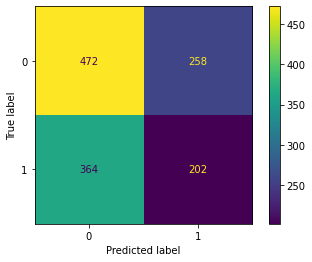

In [28]:
# get predictions
pred_p_prcp = rf_2.predict_proba(test_2.loc[:, pred_vars_2])
pred_i_prcp = rf_2.predict(test_2.loc[:, pred_vars_2])

# evaluation

metrics.plot_confusion_matrix(rf_2, test_2.loc[:, pred_vars_2], test_2['I_PRCP'])
print(metrics.classification_report(test_2['I_PRCP'], pred_i_prcp, digits=5))

In [29]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
file_name = 'rf_3day_prcp.sav' 
pickle.dump(rf_2, open(file_name, 'wb'))

In [30]:
weather_test = pd.read_csv('data/last_ten_alb.csv')


weather_test['YEARMODA'] = pd.to_datetime(weather_test['YEARMODA'])
print("Most recent date in data:", weather_test['YEARMODA'].max())

Most recent date in data: 2021-10-04 00:00:00


In [31]:
most_recent_data = weather['YEARMODA'].max()
# https://stackoverflow.com/questions/39964558/pandas-max-value-index
most_recent_yday = weather_test.loc[weather_test['YEARMODA'].idxmax(), 'YDAY']
print("Most recent date in data:", weather_test['YEARMODA'].max())


# figure out starting dates for predictions
prediction_start = most_recent_data + timedelta(days=1)
prediction_start_yday = list(most_recent_yday + range(1,4))

# generate list of dates for predictions
eval_dates = pd.date_range(prediction_start, periods=3).tolist()

Most recent date in data: 2021-10-04 00:00:00


In [32]:
prediction_start_yday

[278, 279, 280]

In [33]:
predictions_df = pd.DataFrame(eval_dates, columns=['YEARMODA'])
predictions_df['YDAY'] = prediction_start_yday


# add these to the main dataframe
weather_test = weather_test.append(predictions_df, ignore_index=True)
weather_test[['YEARMODA', 'YDAY', 'SLP', 'I_PRCP']].tail()

,YEARMODA,YDAY,SLP,I_PRCP
3928,2021-10-03,276,1015.1,0.0
3929,2021-10-04,277,1015.2,1.0
3930,2021-10-06,278,NaN,NaN
3931,2021-10-07,279,NaN,NaN
3932,2021-10-08,280,NaN,NaN


In [34]:
weather_test['SLP1'] = weather_test['SLP'].shift(1)
weather_test['SLP2'] = weather_test['SLP'].shift(2)
weather_test['SLP3'] = weather_test['SLP'].shift(3)

In [35]:
prediction_set = weather_test[(weather_test['YEARMODA'] >= prediction_start)].copy()

In [36]:
prediction_set.head()

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_HAIL,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP,SLP1,SLP2,SLP3
3930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,1015.1,1020.0
3931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,1015.1
3932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.2


In [37]:
rf_2 = pickle.load(open(file_name, 'rb'))

In [38]:
prediction_set['P_PRCP'] = rf_2.predict_proba(prediction_set[pred_vars_2])[:,1]

In [39]:
prediction_set.head() # now  we have a probability of  rain for a date not yet in the data!

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP,SLP1,SLP2,SLP3,P_PRCP
3930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,1015.1,1020.0,0.25
3931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,1015.1,0.69
3932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.2,0.73


In [40]:
prediction_set.to_csv('3dayPred.csv')

# Task 2

Try using at least one other data type (rather than SLP (sea-level pressure) to predict the probability of rain. Does your model improve? Evaluation statistics.

In [41]:
weather_3 = pd.read_csv('data/last_ten_alb.csv')


weather_3['YEARMODA'] = pd.to_datetime(weather_3['YEARMODA'])
print("Most recent date in data:", weather_3['YEARMODA'].max())

Most recent date in data: 2021-10-04 00:00:00


In [42]:
weather_3

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_FOG,I_RAIN_DRIZZLE,I_SNOW_ICE,I_HAIL,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP
0,1,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,0,0,0.0,0.0,0.0,0.0,0.6,0.9,67.1,0
1,2,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,1,0,0.0,0.0,0.0,NaN,0.7,0.9,75.4,1
2,3,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,1,0,0.0,0.0,NaN,NaN,0.3,0.5,59.7,1
3,4,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,1,0,0.0,0.0,NaN,NaN,0.3,0.5,67.7,0
4,5,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,0,0,0.0,0.0,0.0,0.0,0.3,0.5,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,3926,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,1,0,0.0,0.0,0.0,NaN,1.1,1.5,75.6,0
3926,3927,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,1,0,0.0,0.0,0.0,0.0,1.0,1.3,72.8,0
3927,3928,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,0,0,0.0,0.0,0.0,0.0,1.2,1.6,74.3,0
3928,3929,725180-14735,ALBANY INTERNATIONAL AIRPORT,US,UNITED STATES,US,USA,NY,42.747,-73.799,...,1,0,0.0,0.0,0.0,NaN,1.5,1.8,83.0,0


In [43]:
weather_3['STP1'] = weather_3['STP'].shift(1)
weather_3['STP2'] = weather_3['STP'].shift(2)
weather_3['STP3'] = weather_3['STP'].shift(3)

In [44]:
display(weather_3[['YEARMODA', 'STP', 'STP1', 'STP2', 'STP3']].head())

,YEARMODA,STP,STP1,STP2,STP3
0,2011-01-01,7.0,NaN,NaN,NaN
1,2011-01-02,3.4,7.0,NaN,NaN
2,2011-01-03,7.6,3.4,7.0,NaN
3,2011-01-04,4.2,7.6,3.4,7.0
4,2011-01-05,998.1,4.2,7.6,3.4


In [45]:
pred_vars_3 = ['YDAY', 'STP1']

# make list of all variables required to generate a forecast
model_vars = pred_vars_3 + ['I_PRCP']

weather_3.dropna(subset=model_vars, inplace=True)

In [46]:
train, test_3= np.split(weather_3, [int(.67 *len(weather_3))])

In [49]:
rf_3 = RandomForestClassifier()

rf_3.fit(train[pred_vars_3], train['I_PRCP'])

RandomForestClassifier()

              precision    recall  f1-score   support

           0    0.61125   0.68399   0.64558       731
           1    0.51368   0.43416   0.47059       562

    accuracy                        0.57541      1293
   macro avg    0.56247   0.55908   0.55808      1293
weighted avg    0.56884   0.57541   0.56952      1293



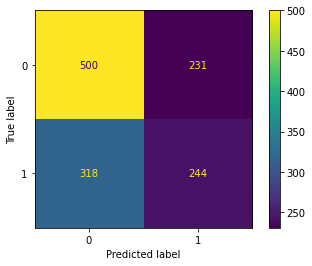

In [50]:
# get predictions
pred_p_prcp = rf_3.predict_proba(test_3.loc[:, pred_vars_3])
pred_i_prcp = rf_3.predict(test_3.loc[:, pred_vars_3])

# evaluation

metrics.plot_confusion_matrix(rf_3, test_3.loc[:, pred_vars_3], test_3['I_PRCP'])
print(metrics.classification_report(test_3['I_PRCP'], pred_i_prcp, digits=5))

In [51]:
most_recent_data = weather_3['YEARMODA'].max()
# https://stackoverflow.com/questions/39964558/pandas-max-value-index
most_recent_yday = weather_3.loc[weather_3['YEARMODA'].idxmax(), 'YDAY']
print("Most recent date in data:", weather_3['YEARMODA'].max())


# figure out starting dates for predictions
prediction_start = most_recent_data + timedelta(days=1)
prediction_start_yday = list(most_recent_yday + range(1,2))

# generate list of dates for predictions
eval_dates = pd.date_range(prediction_start, periods=1).tolist()

Most recent date in data: 2021-10-04 00:00:00


In [52]:
prediction_start_yday

[278]

In [53]:
predictions_df = pd.DataFrame(eval_dates, columns=['YEARMODA'])
predictions_df['YDAY'] = prediction_start_yday


# add these to the main dataframe
weather_3 = weather_3.append(predictions_df, ignore_index=True)
weather_3[['YEARMODA', 'YDAY', 'STP', 'STP1', 'I_PRCP', ]].tail()

,YEARMODA,YDAY,STP,STP1,I_PRCP
3912,2021-10-01,274,12.0,7.9,0.0
3913,2021-10-02,275,9.3,12.0,0.0
3914,2021-10-03,276,4.5,9.3,0.0
3915,2021-10-04,277,3.5,4.5,1.0
3916,2021-10-05,278,NaN,NaN,NaN


In [54]:
weather_3['STP1'] = weather_3['STP'].shift(1)
weather_3['STP2'] = weather_3['STP'].shift(2)
weather_3['STP3'] = weather_3['STP'].shift(3)

In [55]:
prediction_set = weather_3[(weather_3['YEARMODA'] >= prediction_start)].copy()

In [56]:
prediction_set

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_HAIL,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP,STP1,STP2,STP3
3916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,9.3


In [57]:
prediction_set['P_PRCP'] = rf_3.predict_proba(prediction_set[pred_vars_3])[:,1]

In [58]:
prediction_set.head()

,Unnamed: 0,STNID,NAME,CTRY,COUNTRY_NAME,ISO2C,ISO3C,STATE,LATITUDE,LONGITUDE,...,I_THUNDER,I_TORNADO_FUNNEL,EA,ES,RH,I_PRCP,STP1,STP2,STP3,P_PRCP
3916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,9.3,0.2


### Results

In all cases the new model using STP shifted once outperformed the previous two models using SLP shifted once and three times. STP outperformed the other two in precision, recall, f1-score and accuracy.

SLP1
              precision    recall  f1-score   support

           0    0.60195   0.67442   0.63613       731
           1    0.50209   0.42403   0.45977       566

    accuracy                        0.56515      1297
   macro avg    0.55202   0.54922   0.54795      1297
weighted avg    0.55837   0.56515   0.55917      1297

SLP3
              precision    recall  f1-score   support

           0    0.56459   0.64658   0.60281       730
           1    0.43913   0.35689   0.39376       566

    accuracy                        0.52006      1296
   macro avg    0.50186   0.50173   0.49829      1296
weighted avg    0.50980   0.52006   0.51151      1296

STP1
              precision    recall  f1-score   support

           0    0.61125   0.68399   0.64558       731
           1    0.51368   0.43416   0.47059       562

    accuracy                        0.57541      1293
   macro avg    0.56247   0.55908   0.55808      1293
weighted avg    0.56884   0.57541   0.56952      1293



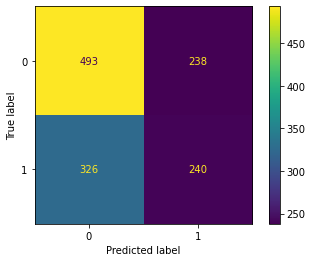

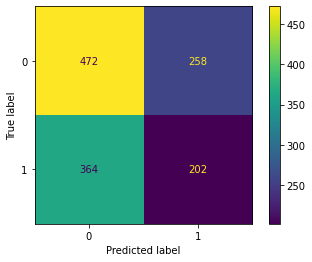

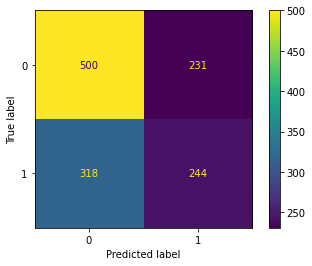

In [60]:
# get predictions
pred_p_prcp = rf.predict_proba(test.loc[:, pred_vars])
pred_i_prcp = rf.predict(test.loc[:, pred_vars])

# evaluation

metrics.plot_confusion_matrix(rf, test.loc[:, pred_vars], test['I_PRCP'])
print('SLP1')
print(metrics.classification_report(test['I_PRCP'], pred_i_prcp, digits=5))

# get predictions
pred_p_prcp = rf_2.predict_proba(test_2.loc[:, pred_vars_2])
pred_i_prcp = rf_2.predict(test_2.loc[:, pred_vars_2])

# evaluation

metrics.plot_confusion_matrix(rf_2, test_2.loc[:, pred_vars_2], test_2['I_PRCP'])
print('SLP3')
print(metrics.classification_report(test_2['I_PRCP'], pred_i_prcp, digits=5))

# get predictions
pred_p_prcp = rf_3.predict_proba(test_3.loc[:, pred_vars_3])
pred_i_prcp = rf_3.predict(test_3.loc[:, pred_vars_3])

# evaluation

metrics.plot_confusion_matrix(rf_3, test_3.loc[:, pred_vars_3], test_3['I_PRCP'])
print('STP1')
print(metrics.classification_report(test_3['I_PRCP'], pred_i_prcp, digits=5))